<a href="https://colab.research.google.com/github/Jaumzinho109/Impactus_Python_Scripts/blob/main/Payroll_graphs_and_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

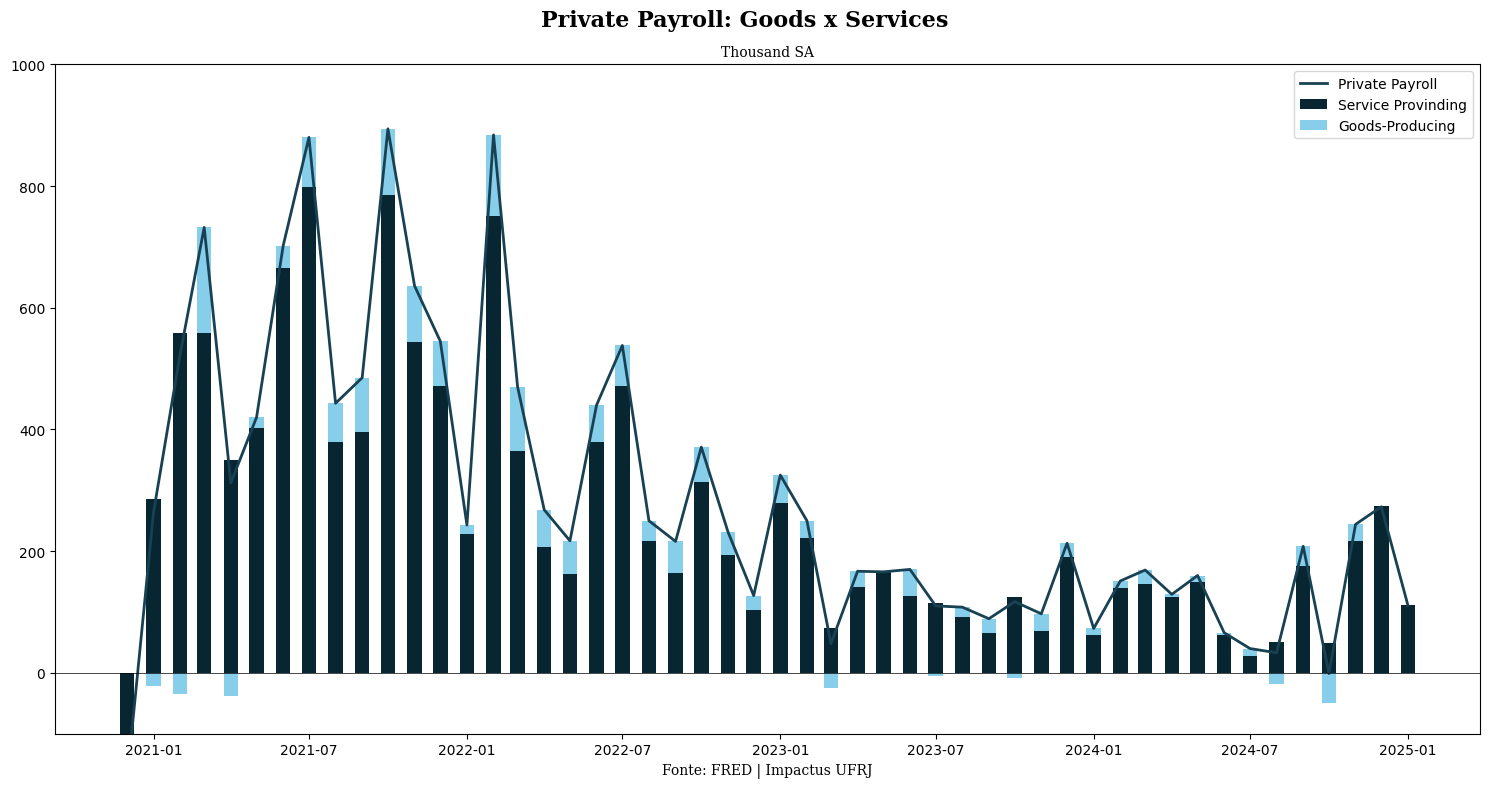

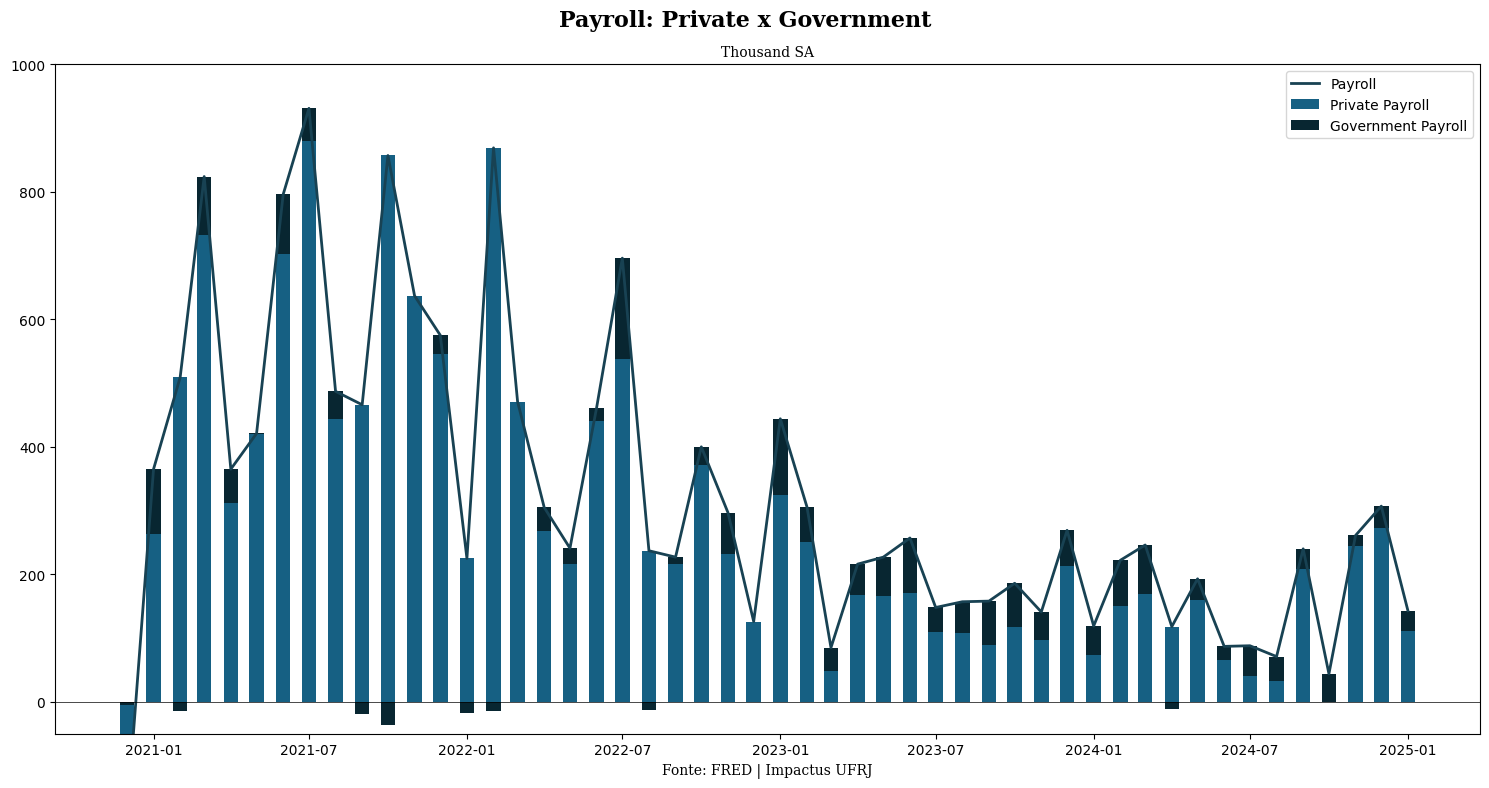

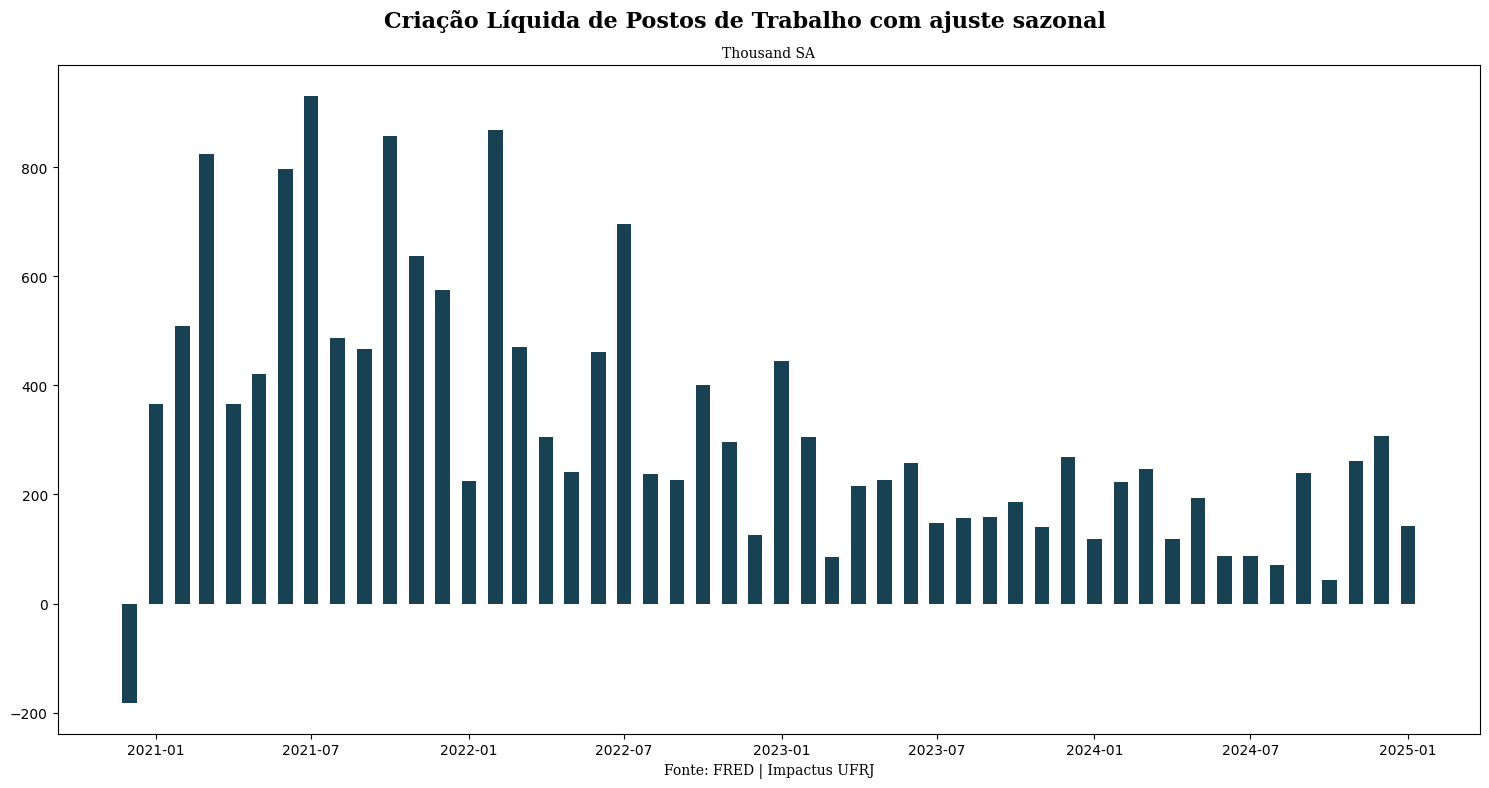

In [ ]:
import pandas as pd
from fredapi import Fred
import matplotlib.pyplot as plt
import numpy as np

fred = Fred(api_key="672d5598c8a41df9397cc5eb92c02d5e")#Minha chave do FED

#Pegando dados do Payroll
dados = fred.get_series("PAYEMS")
df = pd.DataFrame(dados, columns=["Total"])
df.index.name = "Date"
df["Criação Líquida de Postos de Trabalho"] = df["Total"].diff()
payroll_2324 = df.tail(50)
indice = payroll_2324.index

#Payroll do governo
government_payroll_data = fred.get_series("USGOVT")
goverment_payroll = pd.DataFrame(government_payroll_data, columns=["Total"])
goverment_payroll.index.name = "Date"
goverment_payroll["Criação Líquida de Postos de Trabalho no Governo"] = goverment_payroll["Total"].diff()
gov = goverment_payroll.tail(50)

#Payroll Privado
private_payroll_data = fred.get_series("USPRIV")
private_payroll = pd.DataFrame(private_payroll_data, columns = ["Total"])
private_payroll.index.name = "Date"
private_payroll["Criação Líquida de Postos de Trabalho no Setor Privado"] = private_payroll["Total"].diff()
priv = private_payroll.tail(50)

#Payroll privado - parte de bens
goods_payroll_data = fred.get_series("USGOOD")
goodp_payroll = pd.DataFrame(goods_payroll_data, columns = ["Total"])
goodp_payroll.index.name = "Date"
goodp_payroll["Criação Líquida de Postos de Trabalho em Bens no Setor Privado"] = goodp_payroll["Total"].diff()
good = goodp_payroll.tail(50)

#Payroll privado - parte de serviços
services_payroll_data = fred.get_series("CES0800000001")
services_private_payroll = pd.DataFrame(services_payroll_data, columns = ["Total"])
services_private_payroll.index.name = "Date"
services_private_payroll["Criação Líquida de Postos em Serviços no Setor Privado"] = services_private_payroll["Total"].diff()
servp = services_private_payroll.tail(50)

#Transformando valores em matrizes
servp_values = np.array(servp["Criação Líquida de Postos em Serviços no Setor Privado"])
good_values = np.array(good["Criação Líquida de Postos de Trabalho em Bens no Setor Privado"])

#Arrumando quem vai ficar em cima ou em baixo, a fim de que o gráfico de barras
#para que os valores negativos apareçam
bottom_good = np.where(good_values >= 0, servp_values, 0)
bottom_serv = np.where(good_values < 0, good_values, 0)

#Gráfico para setor privado: bens e serviços
plt.figure(figsize= (15,8))
plt.bar(indice, servp_values, width=17, color="#082631", label="Service Provinding")
plt.bar(indice, good_values, width=17, color="#87CEEB", label="Goods-Producing", bottom=bottom_good)
plt.plot(indice, priv["Criação Líquida de Postos de Trabalho no Setor Privado"], color= '#184253', label= "Private Payroll", linewidth= 2)
plt.ylim( -100, 1000)
plt.legend()
plt.suptitle("Private Payroll: Goods x Services", fontweight="bold", fontsize=16, family='serif')
plt.title("Thousand SA", fontsize = 10, family='serif')
plt.axhline(y=0, color="black",  linewidth=0.5, label="Linha no eixo X")
plt.xlabel("Fonte: FRED | Impactus UFRJ", fontsize= 10, family='serif')
plt.tight_layout()
plt.show()


#Tratando valores do payroll do governo e privado para valores negativos aparecerem
priv_values = np.array(priv["Criação Líquida de Postos de Trabalho no Setor Privado"])
gov_values = np.array(gov["Criação Líquida de Postos de Trabalho no Governo"])
bottom_gov = np.where(gov_values >= 0, priv_values, 0)
bottom_priv = np.where(gov_values < 0, gov_values, 0)

#Gráfico payroll governo e privado
plt.figure(figsize= (15,8))
plt.bar(indice, priv_values, width=17, color="#166083", label="Private Payroll", bottom=bottom_priv)
plt.bar(indice, gov_values, width=17, color="#082631", label="Government Payroll", bottom=bottom_gov)
plt.plot(indice, payroll_2324["Criação Líquida de Postos de Trabalho"], color= '#184253', label= "Payroll", linewidth= 2)
plt.ylim( - 50, 1000)
plt.legend()
plt.suptitle("Payroll: Private x Government", fontweight="bold", fontsize=16, family='serif')
plt.title("Thousand SA", fontsize = 10, family='serif')
plt.axhline(y=0, color="black",  linewidth=0.5, label="Linha no eixo X")
plt.xlabel("Fonte: FRED | Impactus UFRJ", fontsize= 10, family='serif')
plt.tight_layout()
plt.show()

#Gráfico payroll
plt.figure(figsize=(15, 8))
plt.bar(indice, payroll_2324["Criação Líquida de Postos de Trabalho"], width=17, color= "#184253")
plt.suptitle("Criação Líquida de Postos de Trabalho com ajuste sazonal", fontweight="bold", fontsize=16, family='serif')
plt.title("Thousand SA", fontsize = 10, family='serif')
plt.xlabel("Fonte: FRED | Impactus UFRJ", fontsize= 10, family='serif')
plt.tight_layout()
plt.show()

In [ ]:
pip install fredapi

In [ ]:
#Pegando dados de acíclicos

dados_private_ed_health = fred.get_series("USEHS")
private_ed_health = pd.DataFrame(dados_private_ed_health, columns= ["Total"])
private_ed_health["Criação líquida em acíclicos"] = private_ed_health["Total"].diff()
acyclic = private_ed_health.tail(48).copy()
acyclic["Private ex education and Health care and Social Ass."] = priv["Criação Líquida de Postos de Trabalho no Setor Privado"] - acyclic["Criação líquida em acíclicos"]
acyclic["Government + Health Care + Education"] = gov["Criação Líquida de Postos de Trabalho no Governo"] + acyclic["Criação líquida em acíclicos"]
acyclic["P1"] = payroll_2324["Criação Líquida de Postos de Trabalho"]
acyclic["P2"] = acyclic["Private ex education and Health care and Social Ass."] + acyclic["Government + Health Care + Education"]
display(acyclic)

In [ ]:
#colocar os acíclicos em média de 3 meses
maa = pd.DataFrame()
maa["3 MAA Private ex education and Health care and Social Ass."] = acyclic["Private ex education and Health care and Social Ass."].rolling(window=3).mean()
maa["3 MAA Government + Health Care + Education"] = acyclic["Government + Health Care + Education"].rolling(window=3).mean()
maa["3 MAA Payroll"] = payroll_2324["Criação Líquida de Postos de Trabalho"].rolling(window=3).mean(3)
maa = maa.dropna()
ind = maa.index

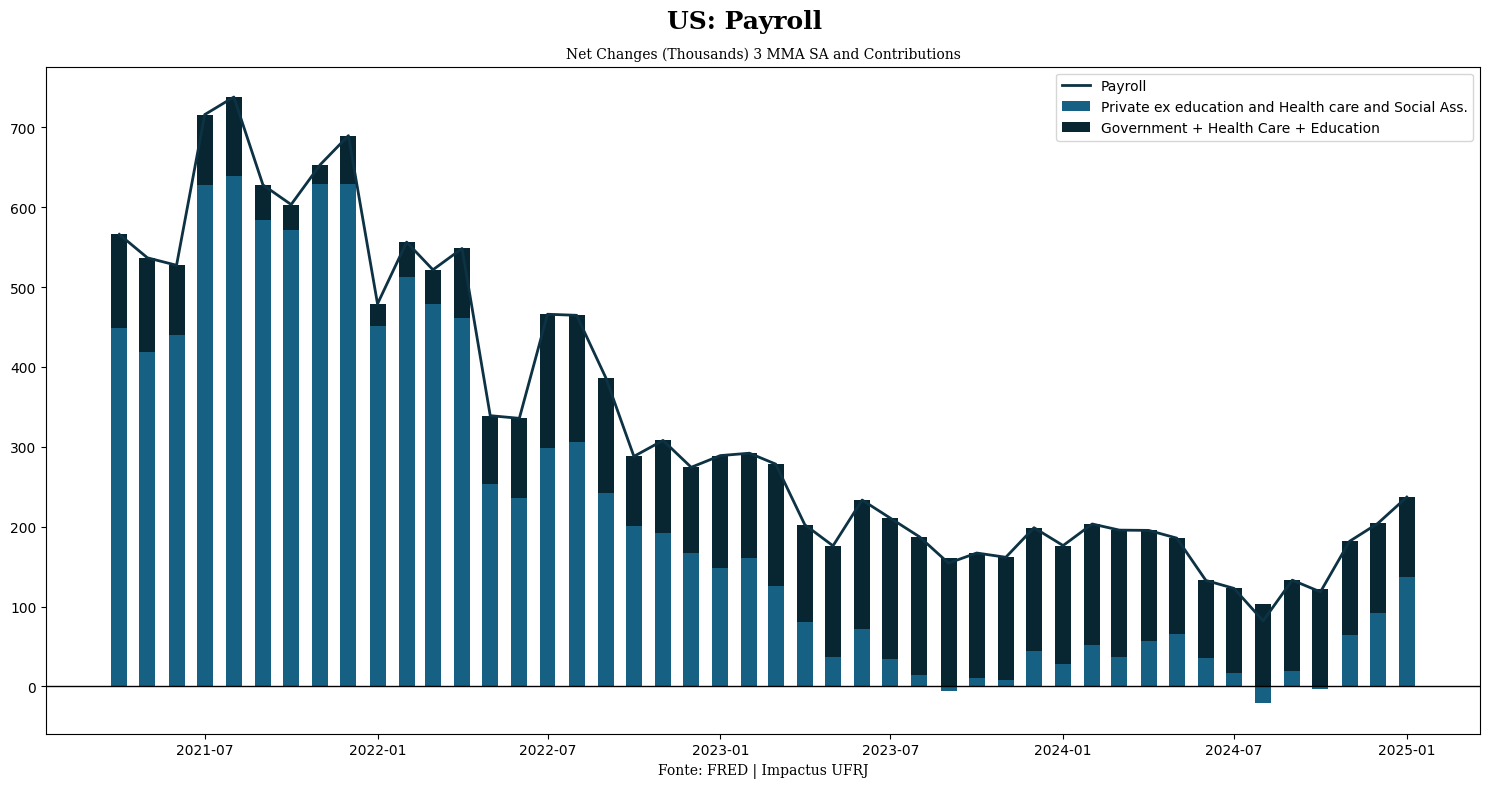

In [ ]:
#coloquei em matrizes para separá-los em positivos e negativos e assim o gráfico n ficar esquisitão
cic_values = np.array(maa["3 MAA Private ex education and Health care and Social Ass."])
acic_values = np.array(maa["3 MAA Government + Health Care + Education"])
cic_values = np.array(maa["3 MAA Private ex education and Health care and Social Ass."])
acic_values = np.array(maa["3 MAA Government + Health Care + Education"])
#Isso foi deveras desagradável, tive que dividir os valores em positivos e negativos para colocar todos os
#positivos em cima e todos os negativos em baixo
cic_positive = np.where(cic_values > 0, cic_values, 0)
cic_negative = np.where(cic_values < 0, cic_values, 0)

acic_positive = np.where(acic_values > 0, acic_values, 0)
acic_negative = np.where(acic_values < 0, acic_values, 0)

plt.figure(figsize=(15, 8))

#Privado positivo e negativo
plt.bar(ind, cic_positive, width=17, color="#166083", label="Private ex education and Health care and Social Ass.")
plt.bar(ind, cic_negative, width=17, color="#166083")

#Acíclico positivo e negativo
plt.bar(ind, acic_positive, width=17, color="#082631", label="Government + Health Care + Education", bottom=cic_positive)
plt.bar(ind, acic_negative, width=17, color="#082631")

#linhas para payroll
plt.plot(ind, maa["3 MAA Payroll"], linewidth= 2, label= "Payroll", color= "#0c3243")

plt.title("Net Changes (Thousands) 3 MMA SA and Contributions", fontsize= 10, family='serif')
plt.suptitle("US: Payroll", fontweight="bold", fontsize=18, family='serif')
plt.xlabel("Fonte: FRED | Impactus UFRJ", fontsize= 10, family='serif')
plt.axhline(0, color='black', linewidth=1)
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
#Aqui vou fazer o Payroll total, privado e privado sem ac
p2 = fred.get_series("USPRIV")
ac = fred.get_series("USEHS")
pl = fred.get_series("PAYEMS")
breakdown = pd.DataFrame()
breakdown_change = pd.DataFrame()
breakdown["Total Payroll"] = pd.DataFrame(pl)
breakdown["Total Private"] = pd.DataFrame(p2)
breakdown["Total private acyclicals"] = pd.DataFrame(ac)
breakdown_change["Criação líquida de empregos"] = breakdown["Total Payroll"].diff()
breakdown_change["Criação líquida de empregos no setor privado"] = breakdown["Total Private"].diff()
breakdown_change["Criação líquida em acyclicals"] = breakdown["Total private acyclicals"].diff()
breakdown_change["Private ex acyclicals"] = breakdown_change["Criação líquida de empregos no setor privado"] - breakdown_change["Criação líquida em acyclicals"]
breakdown_change = breakdown_change.dropna()
breakdown_f = breakdown_change.rolling(window=3).mean().tail(150)
indc = breakdown_f.index

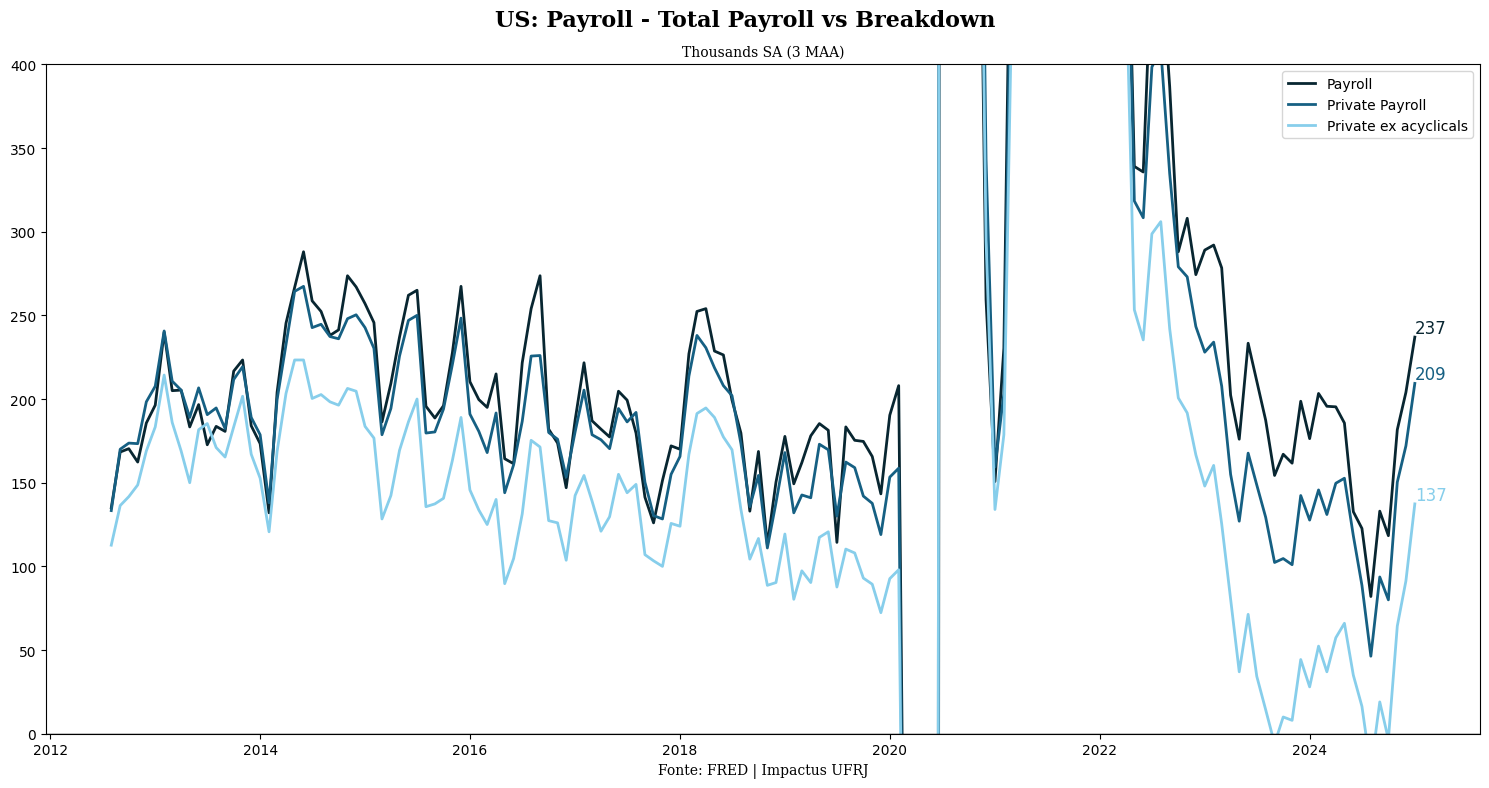

In [ ]:
#Comparação entre o dado cheio, só o privato e a parte cíclica do privado
plt.figure(figsize=(15,8))
plt.plot(indc, breakdown_f["Criação líquida de empregos"], linewidth= 2, color="#082631", label="Payroll")
plt.plot(indc, breakdown_f["Criação líquida de empregos no setor privado"], linewidth= 2, color="#166083", label="Private Payroll")
plt.plot(indc, breakdown_f["Private ex acyclicals"], linewidth= 2, color="#87CEEB", label="Private ex acyclicals")
plt.legend()
for column, color in zip(["Criação líquida de empregos", "Criação líquida de empregos no setor privado", "Private ex acyclicals"],
                          ["#082631", "#166083", "#87CEEB"]):
    plt.text(indc[-1], breakdown_f[column].iloc[-1], f"{breakdown_f[column].iloc[-1]:,.0f}",
             fontsize=12, color=color, verticalalignment='bottom', horizontalalignment='left')
plt.ylim(0, 400)
plt.axhline(0, color='black', linewidth=1)
plt.suptitle("US: Payroll - Total Payroll vs Breakdown", fontsize = 16, family='serif',fontweight= 'bold')
plt.title("Thousands SA (3 MAA)", fontsize= 10, family= 'serif')
plt.xlabel("Fonte: FRED | Impactus UFRJ", fontsize= 10, family='serif')
plt.tight_layout()
plt.show()

In [ ]:
#Gráfico para ver o que o mercado de trabalho diz em relação ao ciclo econômico
breakdown_c = breakdown_change.tail(100)
breakdown_6m = breakdown_change.rolling(window=6).mean().tail(100)

plt.figure(figsize= (15,8))
plt.bar(indc, breakdown_c["Private ex acyclicals"], width= 17, color= "#166083", label= "Private ex acyclicals")
plt.plot(indc, breakdown_f["Private ex acyclicals"], linewidth= 2, color= "#082631", label= "3 MAA")
plt.plot(indc, breakdown_6m["Private ex acyclicals"], linewidth= 2, color= "#87CEEB", label= "6 MAA")
plt.legend()
plt.suptitle("US: Payroll - Special Aggregates Net Monthly Hange", fontsize = 16, family='serif',fontweight= 'bold')
plt.title("Thousands SA: Core Private", fontsize= 10, family= 'serif')
plt.axhline(0, color='black', linewidth=1)
plt.ylim(-100, 400)
plt.xlabel("Fonte: FRED | Impactus UFRJ", fontsize= 10, family='serif')
plt.tight_layout()
plt.show()

In [ ]:
#Sahm Rule Vs Private Payroll - esses são dados de payroll privado e desemprego
p = fred.get_series("USPRIV")
privado = pd.DataFrame()
privado["Private"] = pd.DataFrame(p)
privado["Private pct change"] = privado["Private"].pct_change().rolling(window=3).mean()
privado["Private pct change from a year ago"] = (1 + privado["Private pct change"]).rolling(window=12).apply(np.prod, raw=True) - 1
privado = privado.dropna()
privado = privado.tail(450)
index1 = privado.index
u = fred.get_series("UNRATE")
unrate = pd.DataFrame()
unrate["UnRate"] = pd.DataFrame(u)
unrate["3 MAA"] = unrate["UnRate"].rolling(window=3).mean()
unrate["Min 12 m"]= unrate["UnRate"].rolling(window=12,min_periods=1).min()
unrate["Sahm Rule"] = unrate["3 MAA"] - unrate["Min 12 m"]
unrate = unrate.dropna()
unrate = unrate.tail(450)
index2 = unrate.index

display(unrate)

,UnRate,3 MAA,Min 12 m,Sahm Rule
1987-08-01,6.0,6.100000,6.0,0.100000
1987-09-01,5.9,6.000000,5.9,0.100000
1987-10-01,6.0,5.966667,5.9,0.066667
1987-11-01,5.8,5.900000,5.8,0.100000
1987-12-01,5.7,5.833333,5.7,0.133333
...,...,...,...,...
2024-09-01,4.1,4.166667,3.7,0.466667
2024-10-01,4.1,4.133333,3.7,0.433333
2024-11-01,4.2,4.133333,3.7,0.433333
2024-12-01,4.1,4.133333,3.7,0.433333


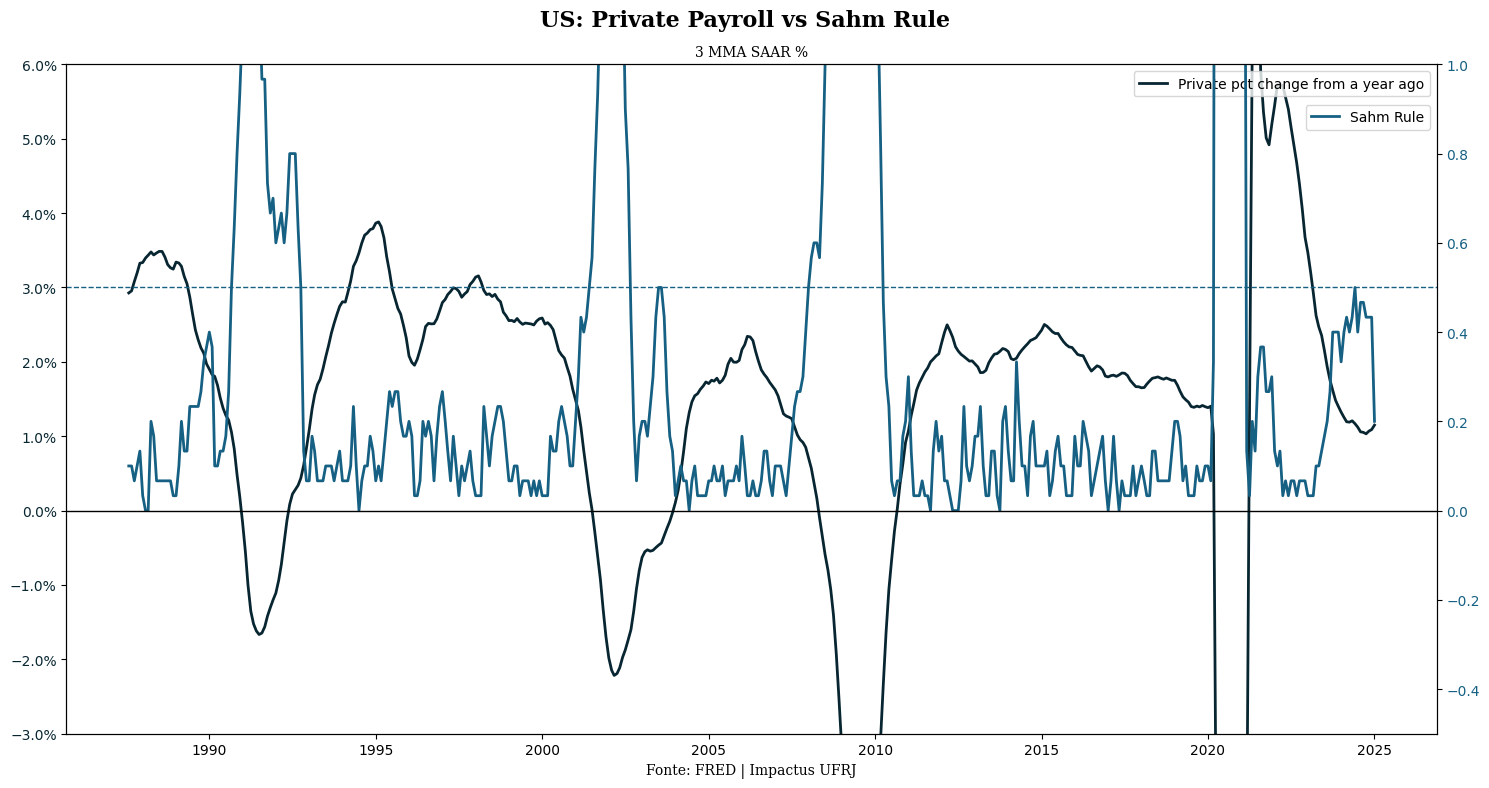

In [ ]:
#Plotando Sahm Rule Vs Payroll privado
import matplotlib.ticker as mtick

fig, ax1 = plt.subplots(figsize= (15,8))

ax1.plot(index1, privado["Private pct change from a year ago"], label="Private pct change from a year ago", color= "#082631", linewidth=2)
ax1.set_ylim(-0.03, 0.06)
ax1.set_xlabel("Fonte: FRED | Impactus UFRJ", fontsize= 10, family='serif')
ax1.tick_params(axis='y', labelcolor="#082631")
ax1.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1))
ax2 = ax1.twinx()
ax2.plot(index1, unrate["Sahm Rule"], label= "Sahm Rule", color= "#166083",linewidth= 2)
ax2.set_ylim(-0.5, 1)
ax2.tick_params(axis='y', labelcolor="#166083")
ax2.axhline(y=0.5, linestyle="--", color="#166083", linewidth=1)
ax1.legend(loc="upper right", bbox_to_anchor=(1, 1))  # Payroll em cima
ax2.legend(loc="upper right", bbox_to_anchor=(1, 0.95))
plt.suptitle("US: Private Payroll vs Sahm Rule", fontsize = 16, family='serif',fontweight= 'bold')
plt.title("3 MMA SAAR %", fontsize= 10, family= 'serif')
plt.axhline(0, color='black', linewidth=1)
plt.tight_layout()
plt.show()

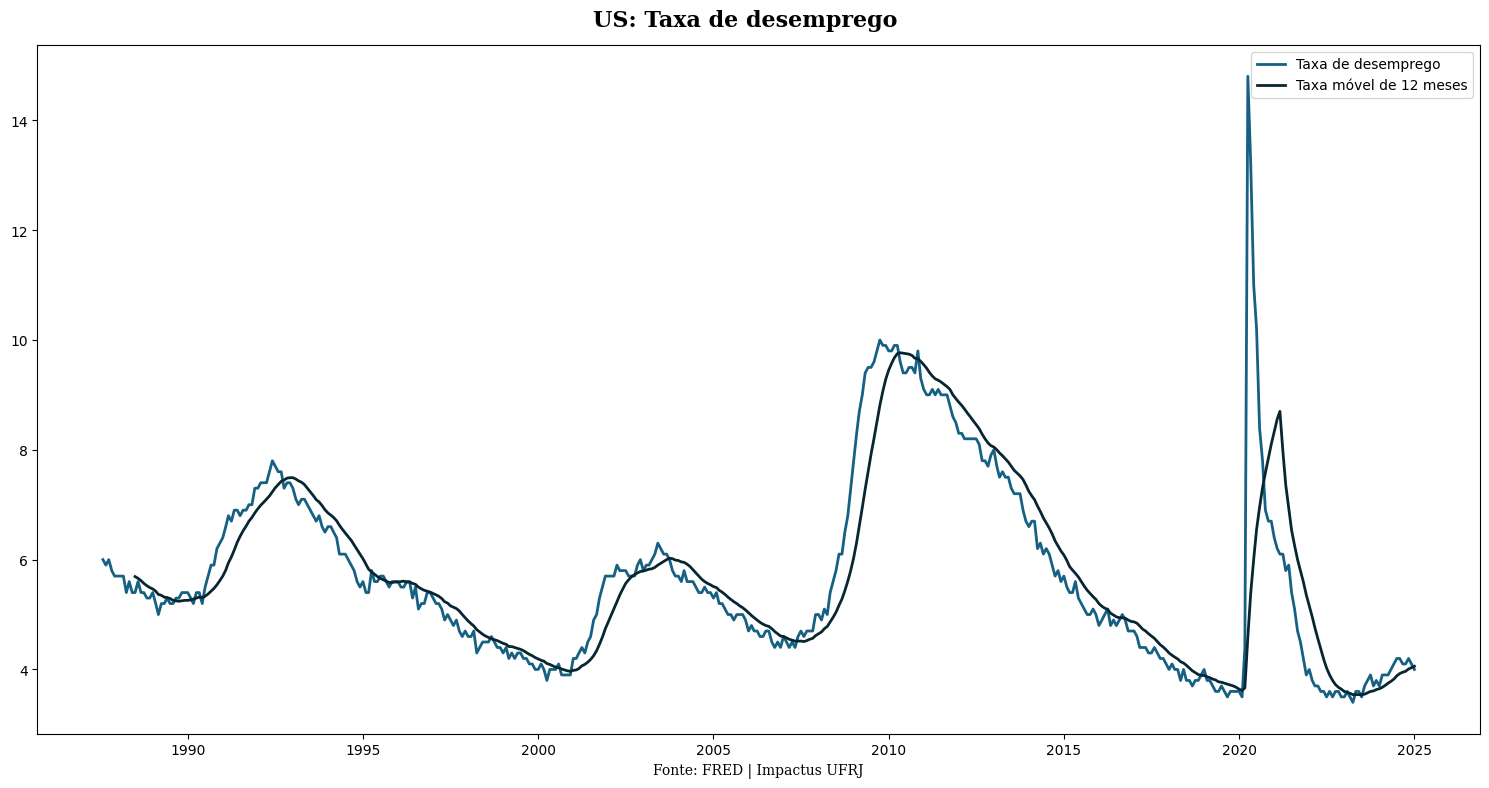

In [ ]:
#Taxa de Desemprego
plt.figure(figsize=(15,8))
unr = unrate.tail(450).copy()
unr["Média de 12 meses"] = unrate["UnRate"].rolling(window=12).mean()
index3 = unr.index
plt.plot(index3, unr["UnRate"], label= "Taxa de desemprego", linewidth= 2, color= "#166083")
plt.plot(index3, unr["Média de 12 meses"], label= "Taxa móvel de 12 meses", linewidth = 2, color = "#082631")
plt.legend()
plt.xlabel("Fonte: FRED | Impactus UFRJ", fontsize= 10, family='serif')
plt.suptitle("US: Taxa de desemprego", fontsize = 16, family='serif',fontweight= 'bold')
plt.tight_layout()
plt.show()

In [ ]:
#Average hourly earnings
avgh = fred.get_series("CES0500000003")
ahe = pd.DataFrame()
ahe["Average Hourly earnings"] = pd.DataFrame(avgh)
ahe["Pct Change"] = ahe["Average Hourly earnings"].pct_change()
ahe["Acumulado de 12 meses"] = (1 + ahe["Pct Change"]).rolling(window=12).apply(np.prod, raw=True) - 1
ahe["3 MMA"] = ahe["Acumulado de 12 meses"].rolling(window=3).mean()
ahe = ahe.dropna()
ahe = ahe.tail(48)
i = ahe.index
display(ahe)

,Average Hourly earnings,Pct Change,Acumulado de 12 meses,3 MMA
2021-02-01,30.07,0.005013,0.053609,0.053310
2021-03-01,30.04,-0.000998,0.045233,0.050417
2021-04-01,30.23,0.006325,0.006325,0.035056
2021-05-01,30.41,0.005954,0.023217,0.024925
2021-06-01,30.55,0.004604,0.039823,0.023122
2021-07-01,30.66,0.003601,0.043212,0.035417
2021-08-01,30.79,0.004240,0.043729,0.042255
2021-09-01,30.96,0.005521,0.049136,0.045359
2021-10-01,31.15,0.006137,0.054146,0.049003
2021-11-01,31.25,0.003210,0.054318,0.052533


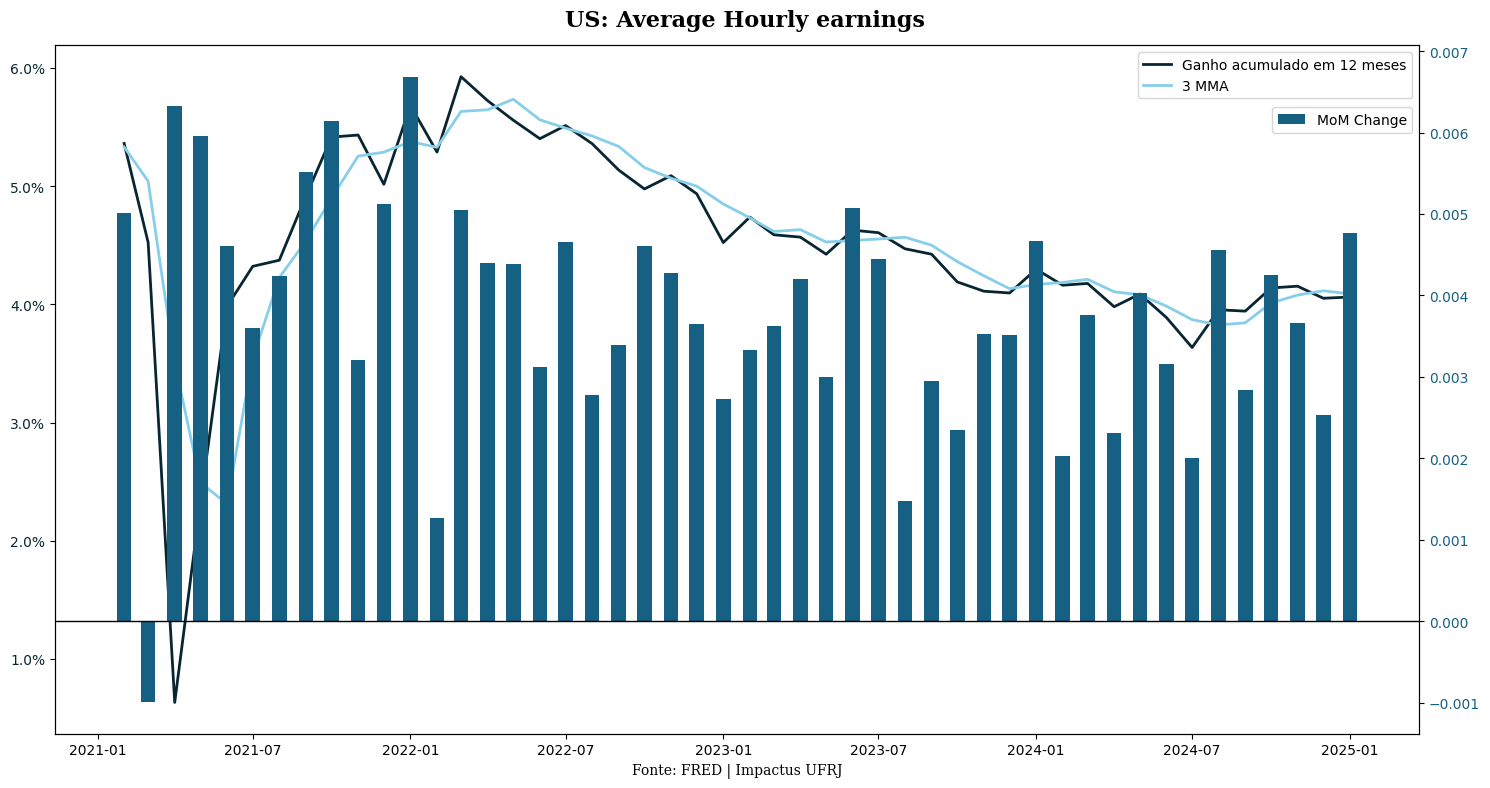

In [ ]:
#Plotando AVG hourly earnings
fig, ax_avghe = plt.subplots(figsize= (15,8))
ax_avghe.plot(i, ahe["Acumulado de 12 meses"], label= "Ganho acumulado em 12 meses", color= "#082631", linewidth = 2)
ax_avghe.plot(i, ahe["3 MMA"], label= "3 MMA", color= "#87CEEB", linewidth = 2)
ax_avghe.set_xlabel("Fonte: FRED | Impactus UFRJ", fontsize= 10, family='serif')
ax_avghe.tick_params(axis='y', labelcolor="#082631")
ax_avghe.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1))
ax_mom = ax_avghe.twinx()
ax_mom.bar(i, ahe["Pct Change"], label= "MoM Change", color= "#166083", width = 17)
ax_mom.tick_params(axis='y', labelcolor="#166083")
ax_avghe.legend(loc="upper right", bbox_to_anchor=(1, 1))
ax_mom.legend(loc="upper right", bbox_to_anchor=(1, 0.92))
plt.suptitle("US: Average Hourly earnings", fontsize = 16, family='serif',fontweight= 'bold')
plt.axhline(0, color='black', linewidth=1)
plt.tight_layout()
plt.show()


In [ ]:
#Unit Labor Cost vs Productivity
pr = fred.get_series("OPHNFB")
labor_productivity = pd.DataFrame()
labor_productivity["Produtividade do Trabalho"] = pd.DataFrame(pr)
labor_productivity["Pct Change from a Year Ago"] = (labor_productivity["Produtividade do Trabalho"] / labor_productivity["Produtividade do Trabalho"].shift(4)) - 1
labor_productivity = labor_productivity.tail(100)
lbc = fred.get_series("PRS85006112")
average_labor_cost = pd.DataFrame()
average_labor_cost["Unit Labor Cost pct change"] = pd.DataFrame(lbc)
average_labor_cost["Pct Change do jeito que eu quero"] = average_labor_cost["Unit Labor Cost pct change"]/100
average_labor_cost = average_labor_cost.tail(100)
index = average_labor_cost.index
index1 = labor_productivity.index
print(len(index), len(index1))

100 100


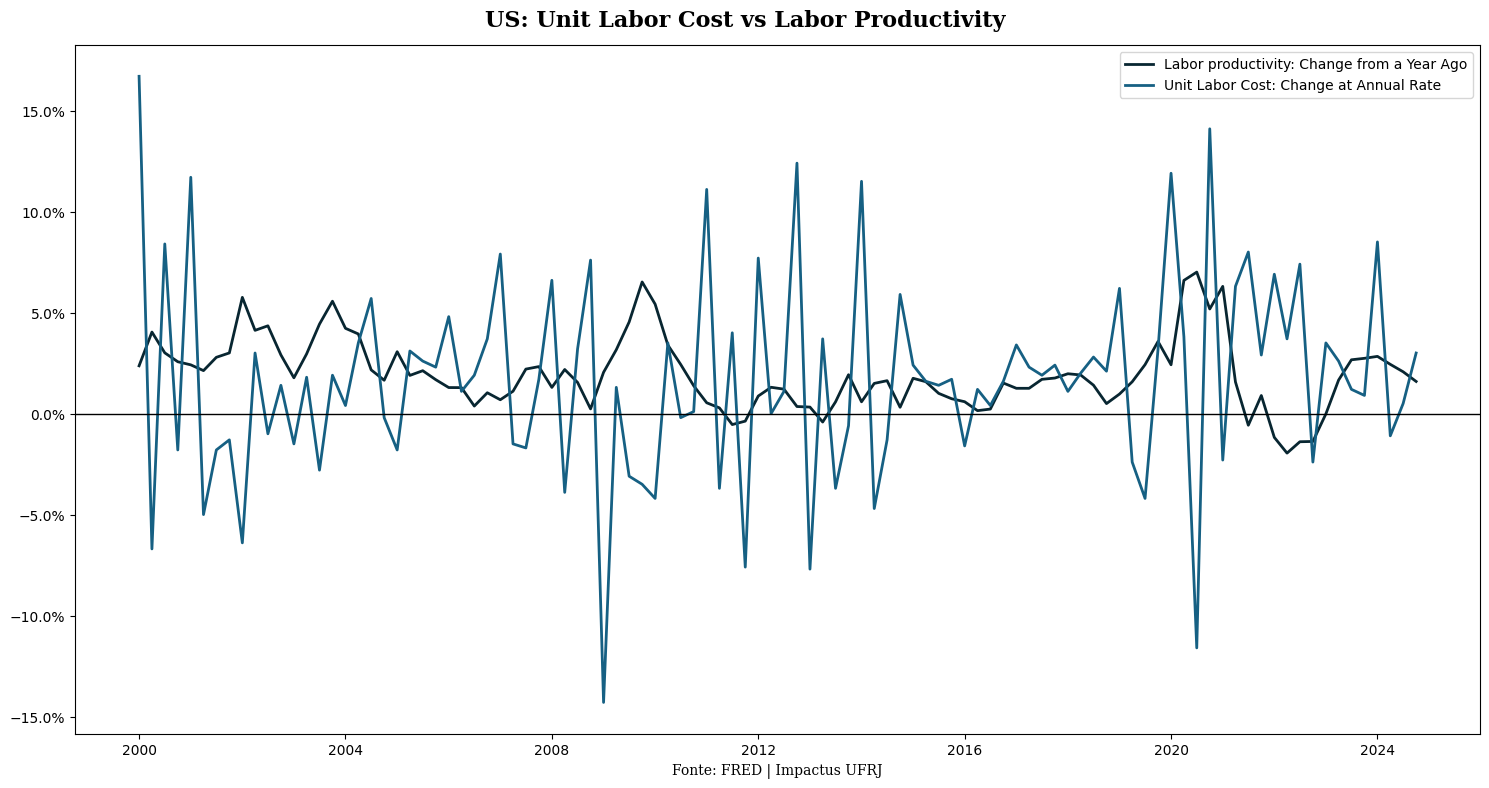

In [ ]:
#Plotando o dado anterior
plt.figure(figsize=(15,8))
plt.plot(index, labor_productivity["Pct Change from a Year Ago"], label= "Labor productivity: Change from a Year Ago", linewidth= 2, color = "#082631")
plt.plot(index, average_labor_cost["Pct Change do jeito que eu quero"], label= "Unit Labor Cost: Change at Annual Rate", linewidth= 2, color = "#166083")
plt.legend()
plt.suptitle("US: Unit Labor Cost vs Labor Productivity", fontsize = 16, family='serif',fontweight= 'bold')
plt.title("Pct Change SA", fontsize= 10, family = "serif")
plt.axhline(0, color='black', linewidth=1)
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1))
plt.xlabel("Fonte: FRED | Impactus UFRJ", fontsize= 10, family='serif')
plt.tight_layout()
plt.show()


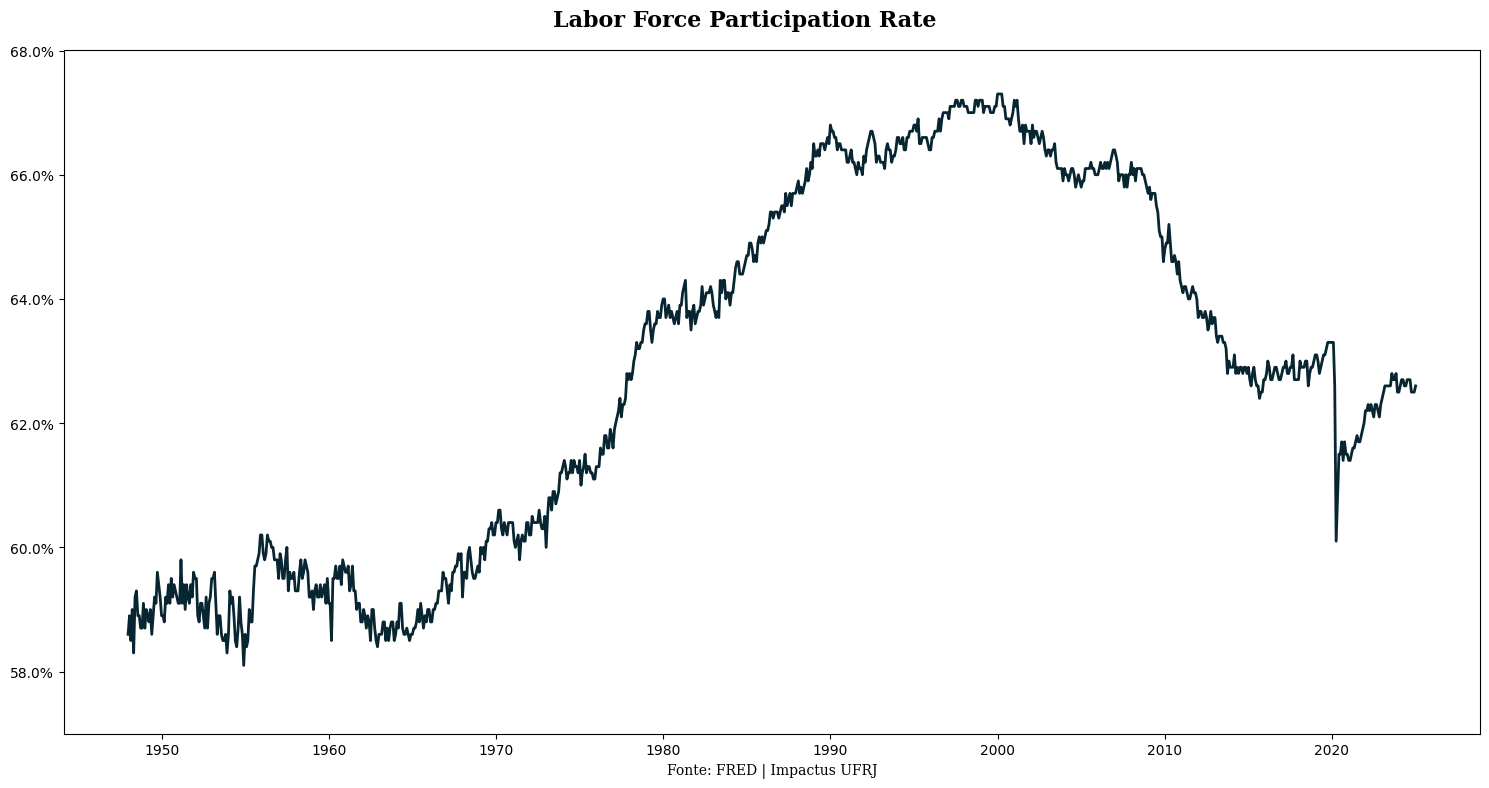

In [ ]:
#Participação da força de trabalho
cvp = fred.get_series("CIVPART")
labor_participation_rate = pd.DataFrame()
labor_participation_rate["Labor Force Participation Rate"] = pd.DataFrame(cvp)
labor_participation_rate["Labor Force Participation Rate"] = labor_participation_rate["Labor Force Participation Rate"]/100
index = labor_participation_rate.index

plt.figure(figsize=(15,8))
plt.plot(index, labor_participation_rate["Labor Force Participation Rate"], linewidth= 2, color = "#082631")
plt.suptitle("Labor Force Participation Rate", fontsize = 16, family='serif',fontweight= 'bold')
plt.axhline(0, color='black', linewidth=1)
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1))
plt.xlabel("Fonte: FRED | Impactus UFRJ", fontsize= 10, family='serif')
plt.ylim(0.57, 0.68)
plt.tight_layout()
plt.show()

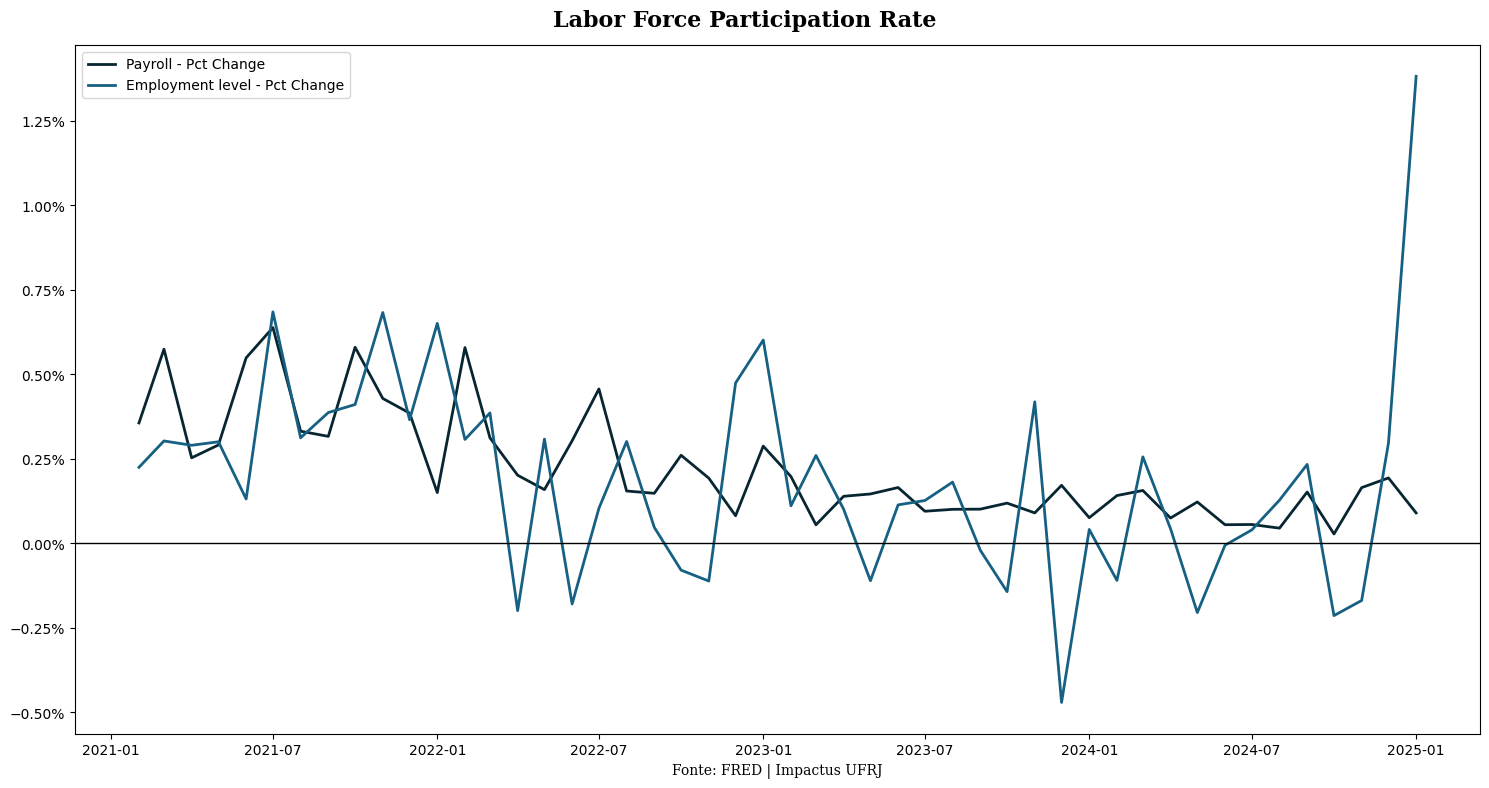

In [ ]:
#Payroll x Nível de emprego
eml = fred.get_series("CE16OV")
pa = fred.get_series("PAYEMS")
employment_level = pd.DataFrame()
payems = pd.DataFrame()
employment_level["Employment Level"] = pd.DataFrame(eml)
employment_level["Pct change"] = employment_level["Employment Level"].pct_change()
payems["Payroll"] = pd.DataFrame(pa)
payems["Pct change"] = payems["Payroll"].pct_change()
payems = payems.tail(48)
employment_level = employment_level.tail(48)
index = employment_level.index
# Plotando

plt.figure(figsize=(15,8))
plt.plot(index, payems["Pct change"], linewidth= 2, color = "#082631", label= "Payroll - Pct Change")
plt.plot(index, employment_level["Pct change"], linewidth= 2, color = "#166083", label= "Employment level - Pct Change")
plt.suptitle("Net Change Number of Job Vacancies Filled", fontsize = 16, family='serif',fontweight= 'bold')
plt.title("Pct Change", fontsize= 10, family='serif')
plt.axhline(0, color='black', linewidth=1)
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1))
plt.xlabel("Fonte: FRED | Impactus UFRJ", fontsize= 10, family='serif')
plt.tight_layout()
plt.legend()
plt.show()

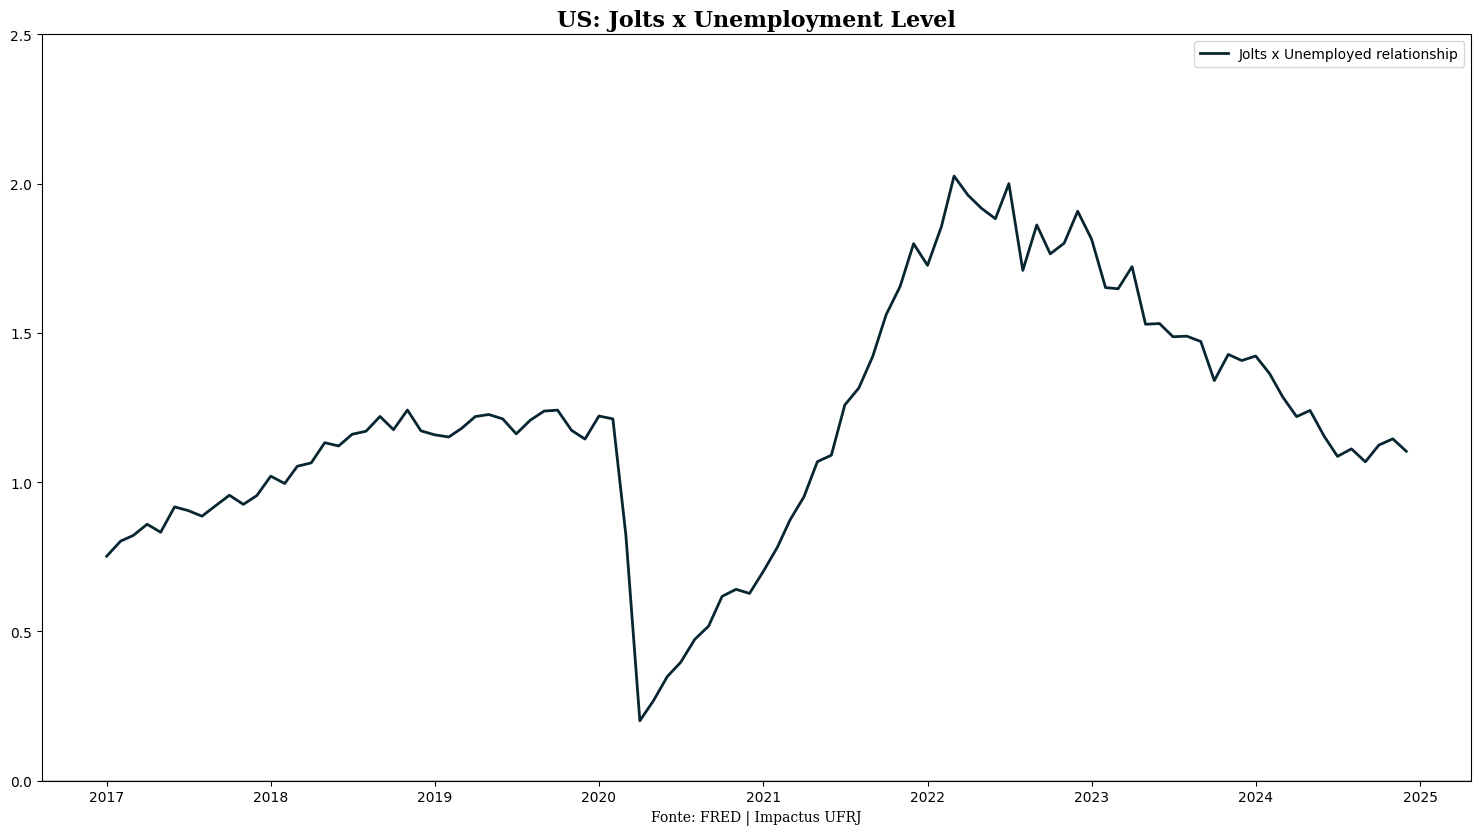

In [ ]:
#Relação Jolts x desempregados
unl = fred.get_series("UNEMPLOY")
jt = fred.get_series("JTSJOL")
unemployment_level = pd.DataFrame()
unemployment_level["Unemplyment Level"] = pd.DataFrame(unl)
unemployment_level = unemployment_level.iloc[:-1]
unemployment_level = unemployment_level.tail(96)
job_openings = pd.DataFrame()
job_openings["Job Openings"] = pd.DataFrame(jt)
job_openings = job_openings.tail(96)
relação_jolts_desempregados = pd.DataFrame()
relação_jolts_desempregados["Jolts x Unemployed relationship"] = job_openings["Job Openings"]/unemployment_level["Unemplyment Level"]
index = relação_jolts_desempregados.index
plt.figure(figsize= (15,8))
plt.plot(index, relação_jolts_desempregados["Jolts x Unemployed relationship"], label= "Jolts x Unemployed relationship", linewidth= 2, color = "#082631" )
plt.legend()
plt.tight_layout()
plt.title("US: Jolts x Unemployment Level", fontsize = 16, family='serif',fontweight= 'bold')
plt.xlabel("Fonte: FRED | Impactus UFRJ", fontsize= 10, family='serif')
plt.ylim(0,2.5)
plt.axhline(0, color='black', linewidth=1)
plt.legend()
plt.show()

In [ ]:
#DF de ordering
ht = fred.get_series("CES6562000101")
health_care = pd.DataFrame()
health_care["All employees"] = pd.DataFrame(ht)
health_care["Diff"] =health_care["All employees"].diff()
health_care["Média de 12 meses"]= health_care["Diff"].rolling(window=12).mean()

rt = fred.get_series("USTRADE")
retail_trade = pd.DataFrame()
retail_trade["All employees"] = pd.DataFrame(rt)
retail_trade["Diff"] =retail_trade["All employees"].diff()
retail_trade["Média de 12 meses"]= retail_trade["Diff"].rolling(window=12).mean()

lh = fred.get_series("USLAH")
leisure_hospitality = pd.DataFrame()
leisure_hospitality["All employees"] = pd.DataFrame(lh)
leisure_hospitality["Diff"] =leisure_hospitality["All employees"].diff()
leisure_hospitality["Média de 12 meses"]= leisure_hospitality["Diff"].rolling(window=12).mean()

pb = fred.get_series("USPBS")
professionalb_services = pd.DataFrame()
professionalb_services["All employees"] = pd.DataFrame(pb)
professionalb_services["Diff"] =professionalb_services["All employees"].diff()
professionalb_services["Média de 12 meses"]= professionalb_services["Diff"].rolling(window=12).mean()

sa = fred.get_series("CES6562400001")
social_assistance = pd.DataFrame()
social_assistance["All employees"] = pd.DataFrame(sa)
social_assistance["Diff"] =social_assistance["All employees"].diff()
social_assistance["Média de 12 meses"]= social_assistance["Diff"].rolling(window=12).mean()

lg = fred.get_series("CES9093000001")
local_government = pd.DataFrame()
local_government["All employees"] = pd.DataFrame(lg)
local_government["Diff"] =local_government["All employees"].diff()
local_government["Média de 12 meses"]= local_government["Diff"].rolling(window=12).mean()

fa = fred.get_series("USFIRE")
financial_activity = pd.DataFrame()
financial_activity["All employees"] = pd.DataFrame(fa)
financial_activity["Diff"] =financial_activity["All employees"].diff()
financial_activity["Média de 12 meses"]= financial_activity["Diff"].rolling(window=12).mean()

ped = fred.get_series("CES6561000001")
private_education = pd.DataFrame()
private_education["All employees"] = pd.DataFrame(ped)
private_education["Diff"] =private_education["All employees"].diff()
private_education["Média de 12 meses"]= private_education["Diff"].rolling(window=12).mean()

sg = fred.get_series("CES9092000001")
state_government = pd.DataFrame()
state_government["All employees"] = pd.DataFrame(sg)
state_government["Diff"] =state_government["All employees"].diff()
state_government["Média de 12 meses"]= state_government["Diff"].rolling(window=12).mean()

inf = fred.get_series("USINFO")
information = pd.DataFrame()
information["All employees"] = pd.DataFrame(inf)
information["Diff"] =information["All employees"].diff()
information["Média de 12 meses"]= information["Diff"].rolling(window=12).mean()

tw = fred.get_series("CES4300000001")
transportation_warehousing = pd.DataFrame()
transportation_warehousing["All employees"] = pd.DataFrame(tw)
transportation_warehousing["Diff"] =transportation_warehousing["All employees"].diff()
transportation_warehousing["Média de 12 meses"]= transportation_warehousing["Diff"].rolling(window=12).mean()

os = fred.get_series("USSERV")
other_services = pd.DataFrame()
other_services["All employees"] = pd.DataFrame(os)
other_services["Diff"] =other_services["All employees"].diff()
other_services["Média de 12 meses"]= other_services["Diff"].rolling(window=12).mean()

cons = fred.get_series("USCONS")
construction = pd.DataFrame()
construction["All employees"] = pd.DataFrame(cons)
construction["Diff"] =construction["All employees"].diff()
construction["Média de 12 meses"]= construction["Diff"].rolling(window=12).mean()

fed = fred.get_series("CES9091000001")
federal = pd.DataFrame()
federal["All employees"] = pd.DataFrame(fed)
federal["Diff"] =federal["All employees"].diff()
federal["Média de 12 meses"]= federal["Diff"].rolling(window=12).mean()

log = fred.get_series("CES1011330001")
logging = pd.DataFrame()
logging["All employees"] = pd.DataFrame(log)
logging["Diff"] =logging["All employees"].diff()
logging["Média de 12 meses"]= logging["Diff"].rolling(window=12).mean()

ut = fred.get_series("CES4422000001")
utilities = pd.DataFrame()
utilities["All employees"] = pd.DataFrame(ut)
utilities["Diff"] =utilities["All employees"].diff()
utilities["Média de 12 meses"]= utilities["Diff"].rolling(window=12).mean()

mn = fred.get_series("CES1021200001")
mining_ex_oil_gas = pd.DataFrame()
mining_ex_oil_gas["All employees"] = pd.DataFrame(mn)
mining_ex_oil_gas["Diff"] =mining_ex_oil_gas["All employees"].diff()
mining_ex_oil_gas["Média de 12 meses"]= mining_ex_oil_gas["Diff"].rolling(window=12).mean()

og = fred.get_series("CES1021100001")
oil_gas = pd.DataFrame()
oil_gas["All employees"] = pd.DataFrame(og)
oil_gas["Diff"] =oil_gas["All employees"].diff()
oil_gas["Média de 12 meses"]= oil_gas["Diff"].rolling(window=12).mean()

wt = fred.get_series("USWTRADE")
whole_sale_trade = pd.DataFrame()
whole_sale_trade["All employees"] = pd.DataFrame(wt)
whole_sale_trade["Diff"] =whole_sale_trade["All employees"].diff()
whole_sale_trade["Média de 12 meses"]= whole_sale_trade["Diff"].rolling(window=12).mean()

man = fred.get_series("MANEMP")
manufacturing = pd.DataFrame()
manufacturing["All employees"] = pd.DataFrame(man)
manufacturing["Diff"] =manufacturing["All employees"].diff()
manufacturing["Média de 12 meses"]= manufacturing["Diff"].rolling(window=12).mean()

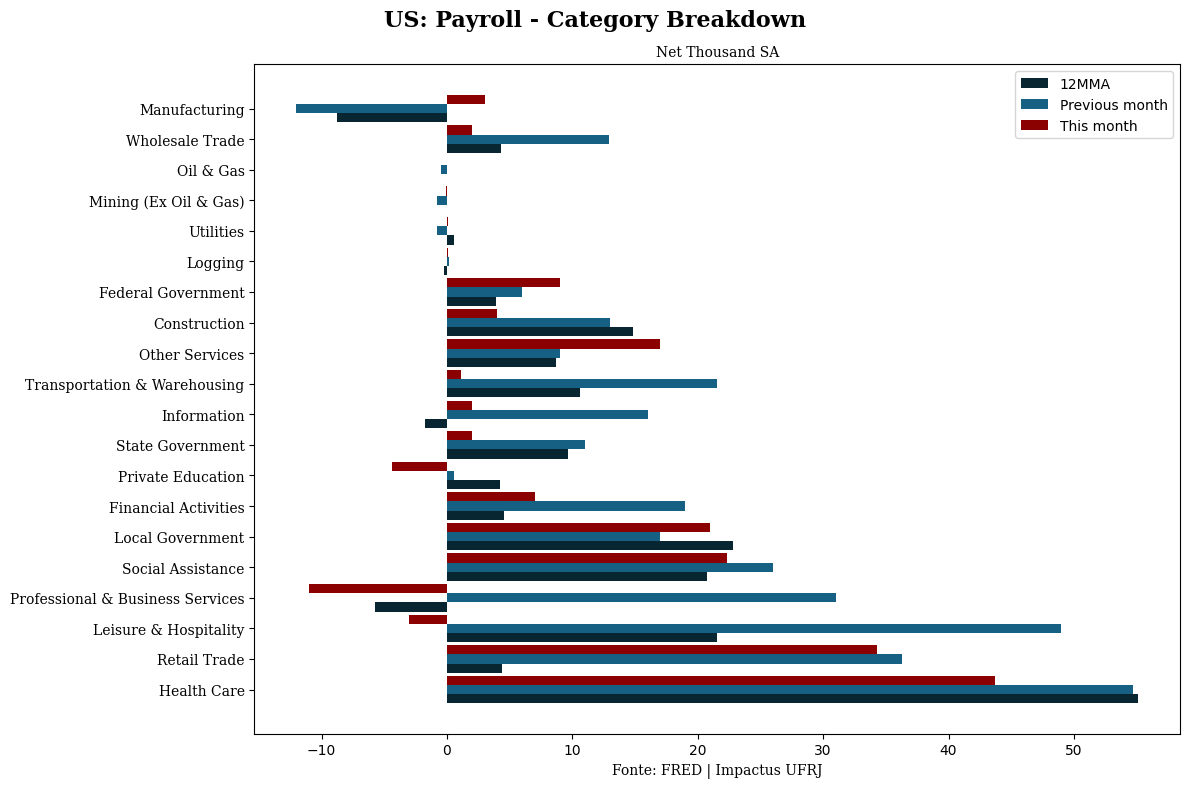

In [36]:
# Plotando ordering
import matplotlib.pyplot as plt
import numpy as np

setores = {
    "Health Care": health_care,
    "Retail Trade": retail_trade,
    "Leisure & Hospitality": leisure_hospitality,
    "Professional & Business Services": professionalb_services,
    "Social Assistance": social_assistance,
    "Local Government": local_government,
    "Financial Activities": financial_activity,
    "Private Education": private_education,
    "State Government": state_government,
    "Information": information,
    "Transportation & Warehousing": transportation_warehousing,
    "Other Services": other_services,
    "Construction": construction,
    "Federal Government": federal,
    "Logging": logging,
    "Utilities": utilities,
    "Mining (Ex Oil & Gas)": mining_ex_oil_gas,
    "Oil & Gas": oil_gas,
    "Wholesale Trade": whole_sale_trade,
    "Manufacturing": manufacturing
}
labels = list(setores.keys())
diff_atual = [df["Diff"].iloc[-1] for df in setores.values()]
diff_anterior = [df["Diff"].iloc[-2] for df in setores.values()]
media_12m = [df["Média de 12 meses"].iloc[-1] for df in setores.values()]

fig, ax = plt.subplots(figsize=(12, 8))
y = np.arange(len(labels))
width = 0.3

ax.barh(y - width, media_12m, width, label="12MMA", color="#082631")
ax.barh(y, diff_anterior, width, label="Previous month", color="#166083")
ax.barh(y + width, diff_atual, width, label="This month", color="darkred")
ax.set_yticks(y)
ax.set_yticklabels(labels, fontsize=10, family='serif')
ax.set_xlabel("Fonte: FRED | Impactus UFRJ", fontsize=10, family='serif')
ax.set_title("Net Thousand SA", fontsize=10, family='serif', fontweight='normal')
ax.legend()
fig.suptitle("US: Payroll - Category Breakdown", fontsize=16, family='serif', fontweight='bold')
fig.tight_layout()
plt.show()


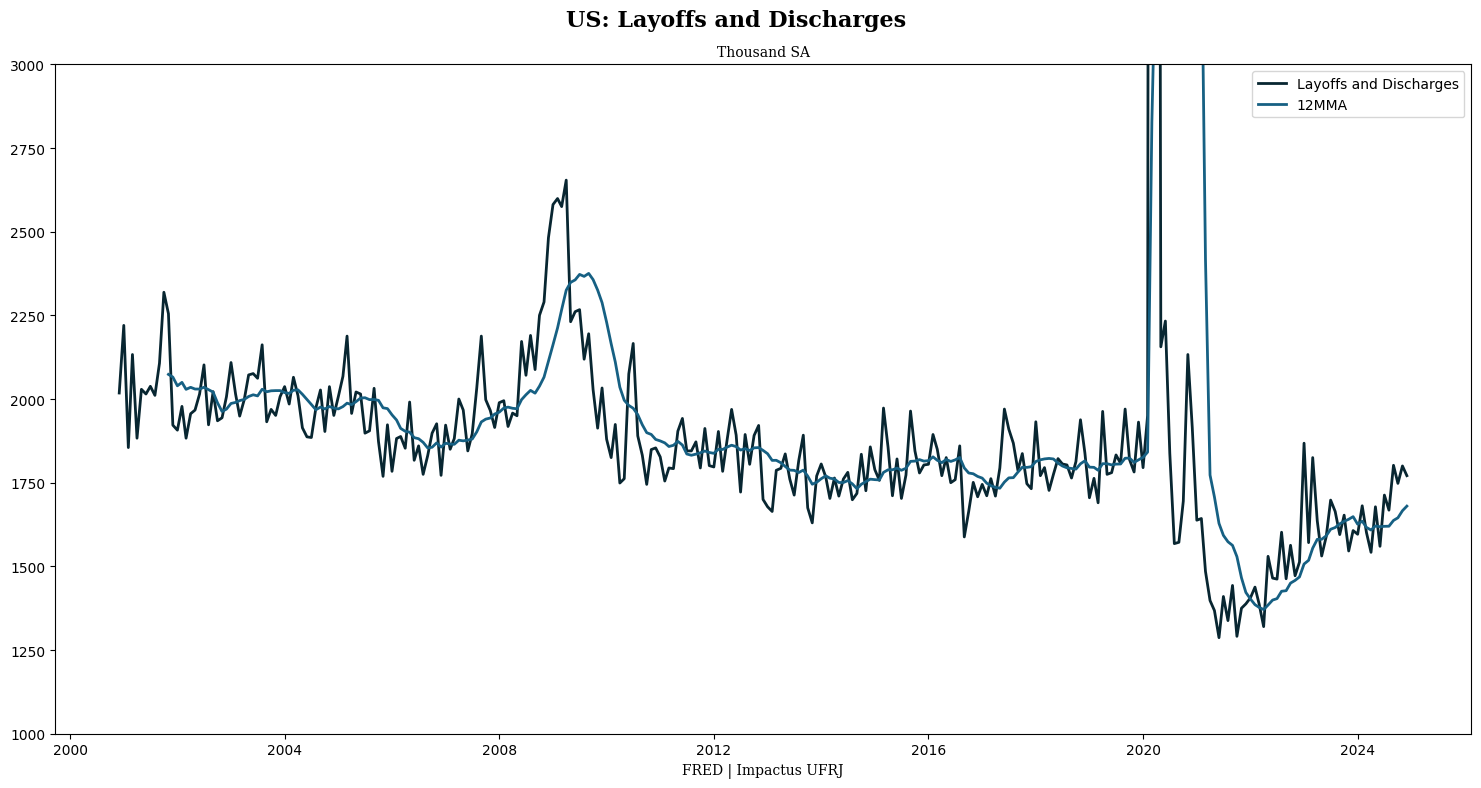

In [ ]:
#Layoffs and discharges
ld = fred.get_series("JTSLDL")
layoffs_and_discharges = pd.DataFrame()
layoffs_and_discharges["Layoffs and Discharges"] = pd.DataFrame(ld)
layoffs_and_discharges["Média de 12 meses"] = layoffs_and_discharges["Layoffs and Discharges"].rolling(window=12).mean()
index = layoffs_and_discharges.index

plt.figure(figsize = (15,8))
plt.plot(index, layoffs_and_discharges["Layoffs and Discharges"], linewidth= 2, color= "#082631", label= "Layoffs and Discharges")
plt.plot(index, layoffs_and_discharges["Média de 12 meses"], linewidth= 2, color= "#166083", label='12MMA')
plt.suptitle("US: Layoffs and Discharges",  fontsize=16, family='serif', fontweight='bold')
plt.title("Thousand SA", fontsize=10, family='serif')
plt.xlabel("FRED | Impactus UFRJ", fontsize= 10, family= 'serif')
plt.legend()
plt.tight_layout()
plt.ylim(1000, 3000)
plt.show()

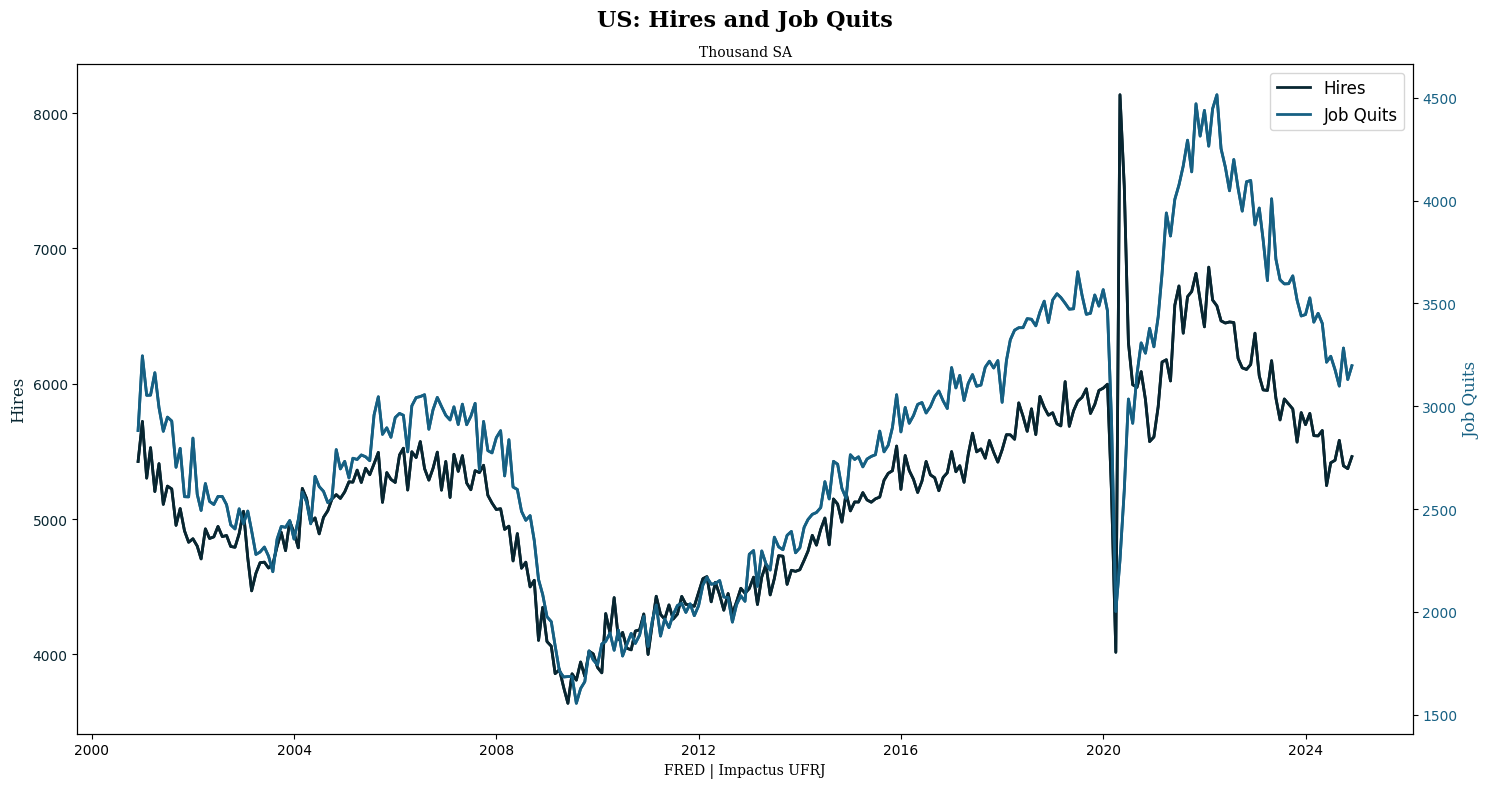

In [ ]:
#Job quits and hires
jq = fred.get_series("JTSQUL")
job_quits = pd.DataFrame()
job_quits["Job Quits"] = pd.DataFrame(jq)
job_quits["Pct Change"] = job_quits['Job Quits'].pct_change()
hr = fred.get_series("JTSHIL")
hires = pd.DataFrame()
hires["Hires"] = pd.DataFrame(hr)
hires["Pct Change"] = hires["Hires"].pct_change()
index = hires.index

fig, ax1 = plt.subplots(figsize=(15, 8))

ax1.set_ylabel("Hires", fontsize=12, family='serif', color="#082631")
ax1.plot(index, hires["Hires"], linewidth=2, color="#082631", label="Hires")
ax1.tick_params(axis='y', labelcolor="#082631")

ax2 = ax1.twinx()
ax2.set_ylabel("Job Quits", fontsize=12, family='serif', color="#166083")
ax2.plot(index, job_quits["Job Quits"], linewidth=2, color="#166083", label="Job Quits")
ax2.tick_params(axis='y', labelcolor="#166083")

fig.suptitle("US: Hires and Job Quits", fontsize=16, family='serif', fontweight='bold')
ax1.set_xlabel("FRED | Impactus UFRJ", fontsize=10, family='serif')
ax1.set_title("Thousand SA", fontsize=10, family='serif')
line1, = ax1.plot(index, hires["Hires"], linewidth=2, color="#082631", label="Hires")
line2, = ax2.plot(index, job_quits["Job Quits"], linewidth=2, color="#166083", label="Job Quits")
lines = [line1, line2]
labels = [line.get_label() for line in lines]
ax1.legend(lines, labels,  fontsize=12)
fig.tight_layout()
plt.show()

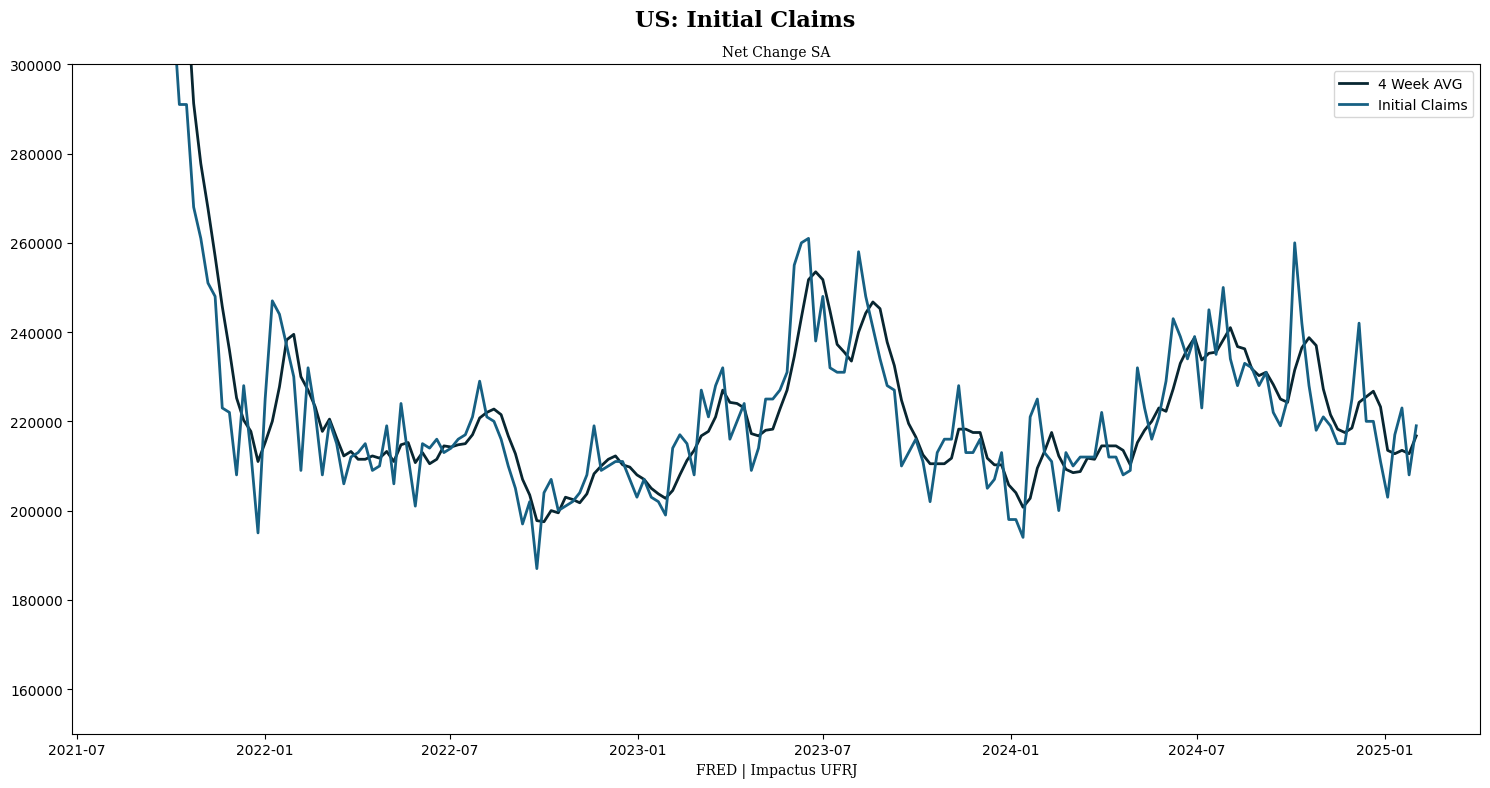

In [ ]:
#initial claims
ic = fred.get_series("ICSA")
initial_claims = pd.DataFrame()
initial_claims["Initial Claims"] = pd.DataFrame(ic)
initial_claims["4 Week AVG"] = initial_claims["Initial Claims"].rolling(window=4).mean()
initial_claims= initial_claims.tail(180)
index = initial_claims.index

plt.figure(figsize=(15,8))
plt.plot(index, initial_claims["4 Week AVG"], linewidth= 2, color= "#082631", label= "4 Week AVG")
plt.plot(index, initial_claims["Initial Claims"], linewidth= 2, color= "#166083", label= "Initial Claims")
plt.suptitle("US: Initial Claims",  fontsize=16, family='serif', fontweight='bold')
plt.title("Net Change SA", fontsize=10, family='serif')
plt.xlabel("FRED | Impactus UFRJ", fontsize= 10, family= 'serif')
plt.legend()
plt.tight_layout()
plt.ylim(150000, 300000)
plt.show()


In [ ]:
cc = fred.get_series("CCSA")
continuing_claims = pd.DataFrame()
continuing_claims["Continuing Claims"] = pd.DataFrame(cc)
index = continuing_claims.index

plt.figure(figsize=(15,8))
plt.plot(index, continuing_claims, linewidth= 2, color= "#082631")
plt.ylim(1000000,7000000)
plt.suptitle("US: Continuing Claims",  fontsize=16, family='serif', fontweight='bold')
plt.xlabel("FRED | Impactus UFRJ", fontsize= 10, family= 'serif')
plt.tight_layout()
plt.show()